In [66]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
import dask.dataframe as dd
import warnings
warnings.filterwarnings('ignore')
import time

In [9]:
#Dataset

In [70]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

In [71]:
df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [74]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [110]:
#cleaning & #handel missing values

In [112]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

df.head(2)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181256 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181053 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [117]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [102]:
#comparison performance between pandas and dask

In [119]:
ddf = dd.from_pandas(df, npartitions=24)
ddf.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 18 entries, Year to Motive
dtypes: object(11), float64(4), int64(3)

In [199]:
#important data &use pandas

In [121]:
df['Country'].value_counts().idxmax()

'Iraq'

In [123]:
df['Region'].value_counts().idxmax()

'Middle East & North Africa'

In [125]:
df['city'].value_counts().index[1]

'Baghdad'

In [127]:
df['Month'].value_counts().idxmax()

5

In [129]:
df['Year'].value_counts().idxmax()

2014

In [131]:
df['Group'].value_counts().index[1]

'Taliban'

In [133]:
df['AttackType'].value_counts().idxmax()

'Bombing/Explosion'

Data Analysis

In [138]:
mean_val = np.mean(df.select_dtypes(include=[np.number]), axis=0)
median_val = np.median(df.select_dtypes(include=[np.number]), axis=0)
std_val = np.std(df.select_dtypes(include=[np.number]), axis=0)

In [140]:
mean_val

Year         2002.638997
Month           6.467277
Day            15.505644
latitude       23.498343
longitude    -458.695653
Killed          2.403272
Wounded         3.167668
dtype: float64

In [142]:
median_val

array([2009.,    6.,   15.,   nan,   nan,   nan,   nan])

In [144]:
std_val

Year             13.259394
Month             3.388294
Day               8.814020
latitude         18.569190
longitude    204778.410577
Killed           11.545707
Wounded          35.949283
dtype: float64

In [146]:
frequent_val = df.select_dtypes(include=[object]).apply(lambda x: x.value_counts().idxmax())

In [148]:
frequent_val

Country                                                     Iraq
state                                                    Baghdad
Region                                Middle East & North Africa
city                                                     Unknown
AttackType                                     Bombing/Explosion
Target                                                 Civilians
Summary        09/00/2016: Sometime between September 18, 201...
Group                                                    Unknown
Target_type                          Private Citizens & Property
Weapon_type                                           Explosives
Motive                                                   Unknown
dtype: object

In [161]:
#calculate aggregate statistics

In [184]:
attack_pyear = df.groupby('Year').size()
killed_pyear = df.groupby('Year')['Killed'].sum()
wounded_pyear = df.groupby('Year')['Wounded'].sum()
region_attack = df.groupby('Region').size()
count_attack = df.groupby('Country').size()
attacks = df['AttackType'].value_counts()
targets = df['Target_type'].value_counts()
killed_pregion = df.groupby('Region')['Killed'].sum()
wounded_pregion = df.groupby('Region')['Wounded'].sum()


In [167]:
attack_pyear.head()

Year
1970    651
1971    471
1972    568
1973    473
1974    581
dtype: int64

In [169]:
killed_pyear.head()

Year
1970    174.0
1971    173.0
1972    566.0
1973    370.0
1974    539.0
Name: Killed, dtype: float64

In [171]:
wounded_pyear.head()

Year
1970    212.0
1971     82.0
1972    409.0
1973    495.0
1974    865.0
Name: Wounded, dtype: float64

In [173]:
region_attack.head()

Region
Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
dtype: int64

In [175]:
count_attack.head()

Country
Afghanistan    12731
Albania           80
Algeria         2743
Andorra            1
Angola           499
dtype: int64

In [177]:
attacks.head()

AttackType
Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: count, dtype: int64

In [180]:
targets.head()

Target_type
Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: count, dtype: int64

In [186]:
killed_pregion.head()

Region
Australasia & Oceania            150.0
Central America & Caribbean    28708.0
Central Asia                    1000.0
East Asia                       1152.0
Eastern Europe                  7415.0
Name: Killed, dtype: float64

In [188]:
wounded_pregion.head()

Region
Australasia & Oceania            260.0
Central America & Caribbean     8991.0
Central Asia                    2009.0
East Asia                       9213.0
Eastern Europe                 12045.0
Name: Wounded, dtype: float64

In [192]:
#dentify trends over time

In [195]:
df['Year'].value_counts(dropna = False).sort_index()

Year
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: count, dtype: int64

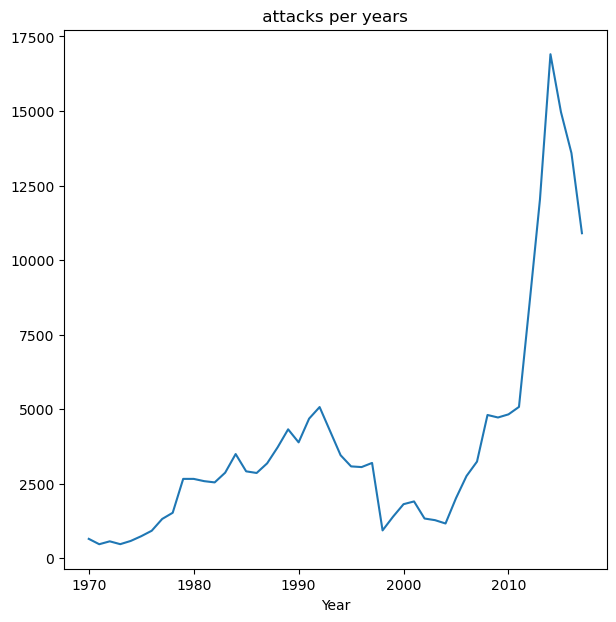

In [201]:
--1
plt.figure(figsize=(7, 7))
sns.lineplot(data=attack_pyear)
plt.title(' attacks per years ')
plt.show()

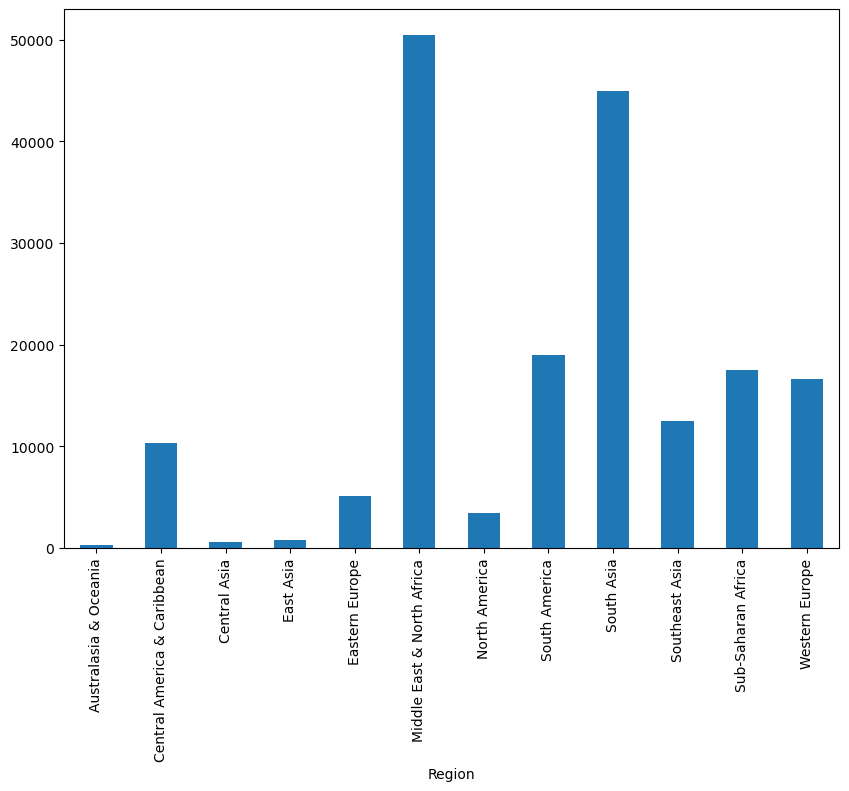

In [212]:
--2
plt.figure(figsize=(10, 7))
region_attack.plot(kind='bar')
plt.show()

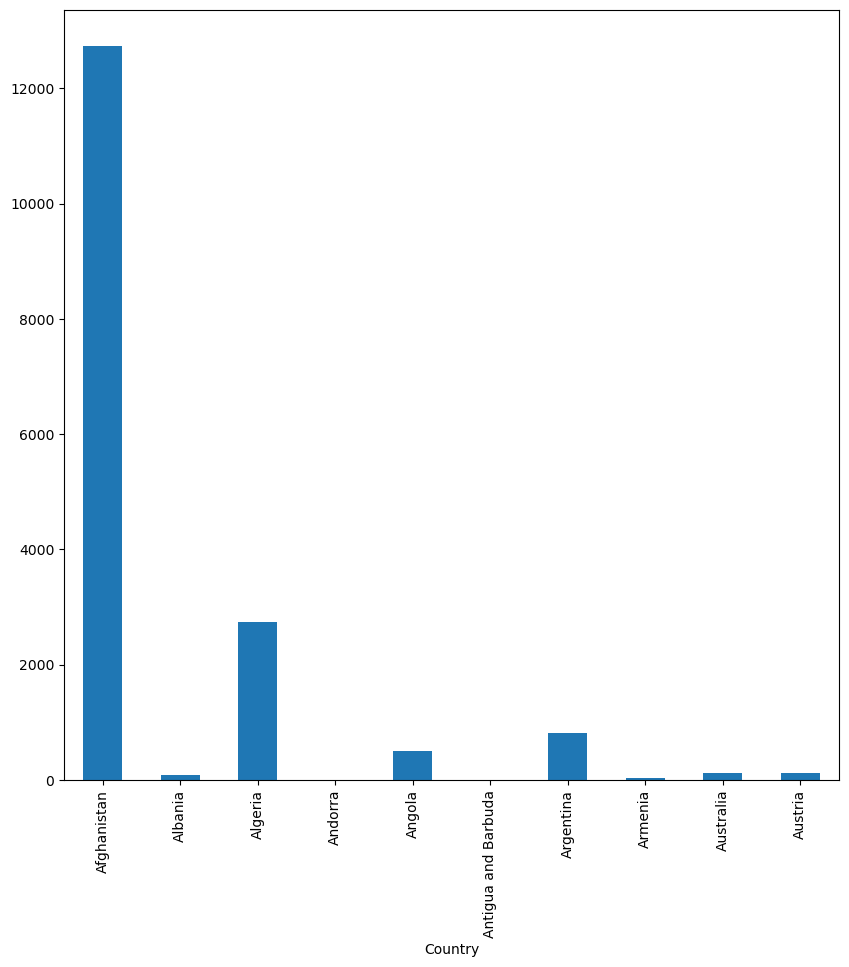

In [230]:
--2-2
plt.figure(figsize=(10, 10))
count_attack[:10].plot(kind='bar')
plt.show()

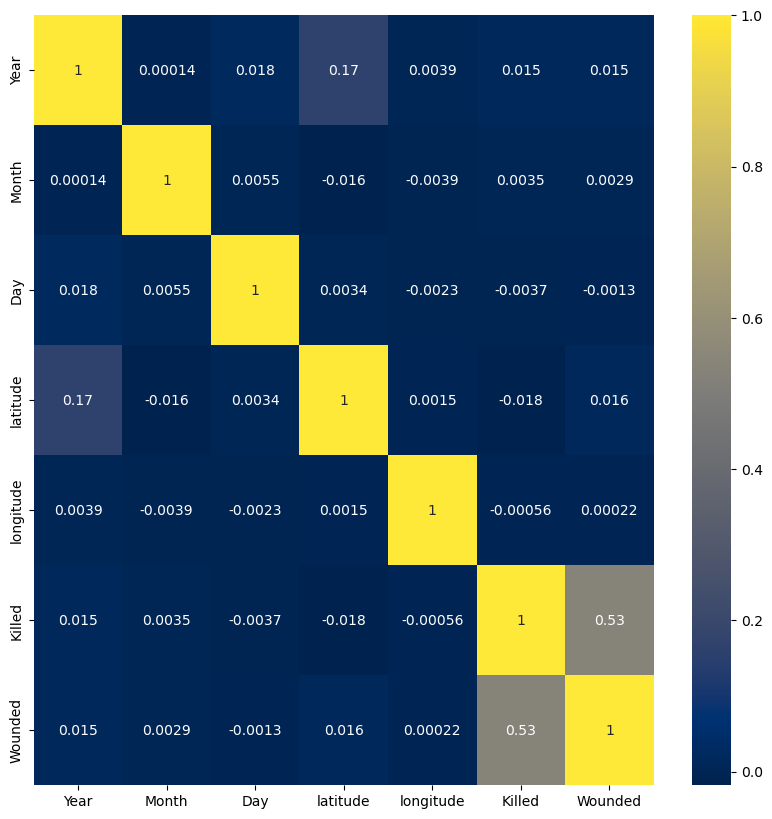

In [232]:
--3
map = df.select_dtypes(include='number')
plt.figure(figsize=(10,10))
sns.heatmap(map.corr(), annot=True, cmap='cividis')
plt.show()

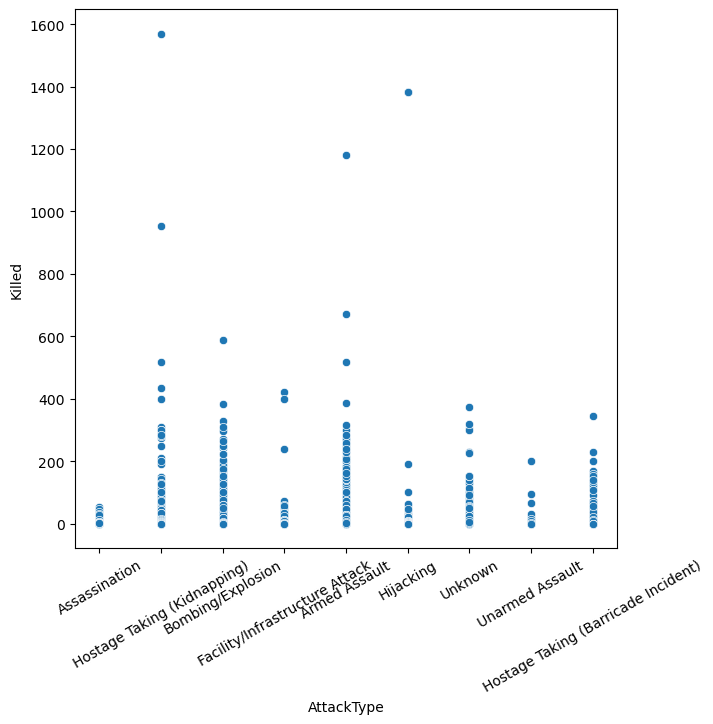

In [244]:
--4
plt.figure(figsize=(7,7))
sns.scatterplot(x='AttackType', y='Killed', data=df)
plt.xticks(rotation=30)
plt.show()

Performance Comparison with Dask:

In [258]:
# Pandas
start_time = time.time()
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
load_time_pandas = time.time() - start_time
print(f"Pandas Load Time: {load_time_pandas:.2f} seconds")

Pandas Load Time: 3.22 seconds


In [260]:
# Dask
start_time = time.time()
ddf = dd.read_csv('globalterrorismdb_0718dist.csv' ,encoding='ISO-8859-1')
load_time_dask = time.time() - start_time

print(f"Dask Load Time: {load_time_dask:.2f} seconds")

Dask Load Time: 0.03 seconds
